In [3]:
import pandas as pd
import numpy as np
import h5py

In [6]:
# h5_file_path = "C:/Git/Artifact-Detection-In-ECG/dataset/features.h5"
# h5_file_path = "C:/Git/Artifact-Detection-In-ECG/dataset/processed_features.h5"
h5_file_path = "C:/Git/Artifact-Detection-In-ECG/dataset/Signal_Test_Public.h5"

In [7]:
with h5py.File(h5_file_path, 'r') as store:
    signal = store['ecg'][:]
    label = store['label'][:]

In [8]:
signal.shape

(300, 1, 2500, 12)

In [9]:
signal = np.squeeze(signal)

In [10]:
signal.shape

(300, 2500, 12)

In [11]:
def z_score_normalization(signal):
    mean = np.mean(signal)
    std_dev = np.std(signal)
    normalized_signal = (signal - mean) / std_dev
    return normalized_signal

In [12]:
def mean_normalization(signal):
    mean = np.mean(signal)
    normed_signal = signal - mean
    return normed_signal

# NORMALIZE -> SINGLE LEAD

In [13]:
signal_list = []
for i in range(signal.shape[0]): # i : subject nbr
    normalized_arrays = [mean_normalization(signal[i,:,l]) for l in range(signal.shape[2])] # l : lead nbr
    combined_array = np.concatenate(normalized_arrays)
    signal_list.append(combined_array)
print(len(signal_list))
print(len(signal_list[0]))

300
30000


In [14]:
np_signal = np.array(signal_list)
print(np_signal.shape)

(300, 30000)


In [15]:
len(label), type(label)

(300, numpy.ndarray)

In [16]:
with h5py.File("./dataset/SingleLead/mean_normalized_sigle_lead_Signal_Test_Public.h5", 'w') as f:
# with h5py.File("./dataset/SingleLead/normalized_sigle_lead_processed_features.h5", 'w') as f:
    f.create_dataset('ecg', data=np_signal)
    f.create_dataset('label', data=np.array(label))

# SINGLE LEAD -> NORMALIZE

In [12]:
signal_list2 = []
for i in range(signal.shape[0]): # i : subject nbr
    normalized_arrays = [signal[i,:,l] for l in range(signal.shape[2])] # l : lead nbr
    combined_array = np.concatenate(normalized_arrays)
    normalized_combined_array = mean_normalization(combined_array)
    signal_list2.append(normalized_combined_array)
print(len(signal_list2))
print(len(signal_list2[0]))

2400
30000


In [13]:
np_signal2 = np.array(signal_list2)
print(np_signal2.shape)

(2400, 30000)


In [14]:
len(label), type(label)

(2400, numpy.ndarray)

In [69]:
with h5py.File("./dataset/SingleLead/sigle_lead_normalized_features.h5", 'w') as f:
# with h5py.File("./dataset/SingleLead/sigle_lead_normalized_processed_features.h5", 'w') as f:
    f.create_dataset('ecg', data=np_signal2)
    f.create_dataset('label', data=np.array(label))

# Visualize

In [15]:
k = 0

normalized_arrays = [signal[k,:,l] for l in range(signal.shape[2])]
kth_combined0 = np.concatenate(normalized_arrays)

kth_combined1 = np_signal[k]

kth_combined2 = np_signal2[k]

In [16]:
len(kth_combined0), len(kth_combined1), len(kth_combined2)

(30000, 30000, 30000)

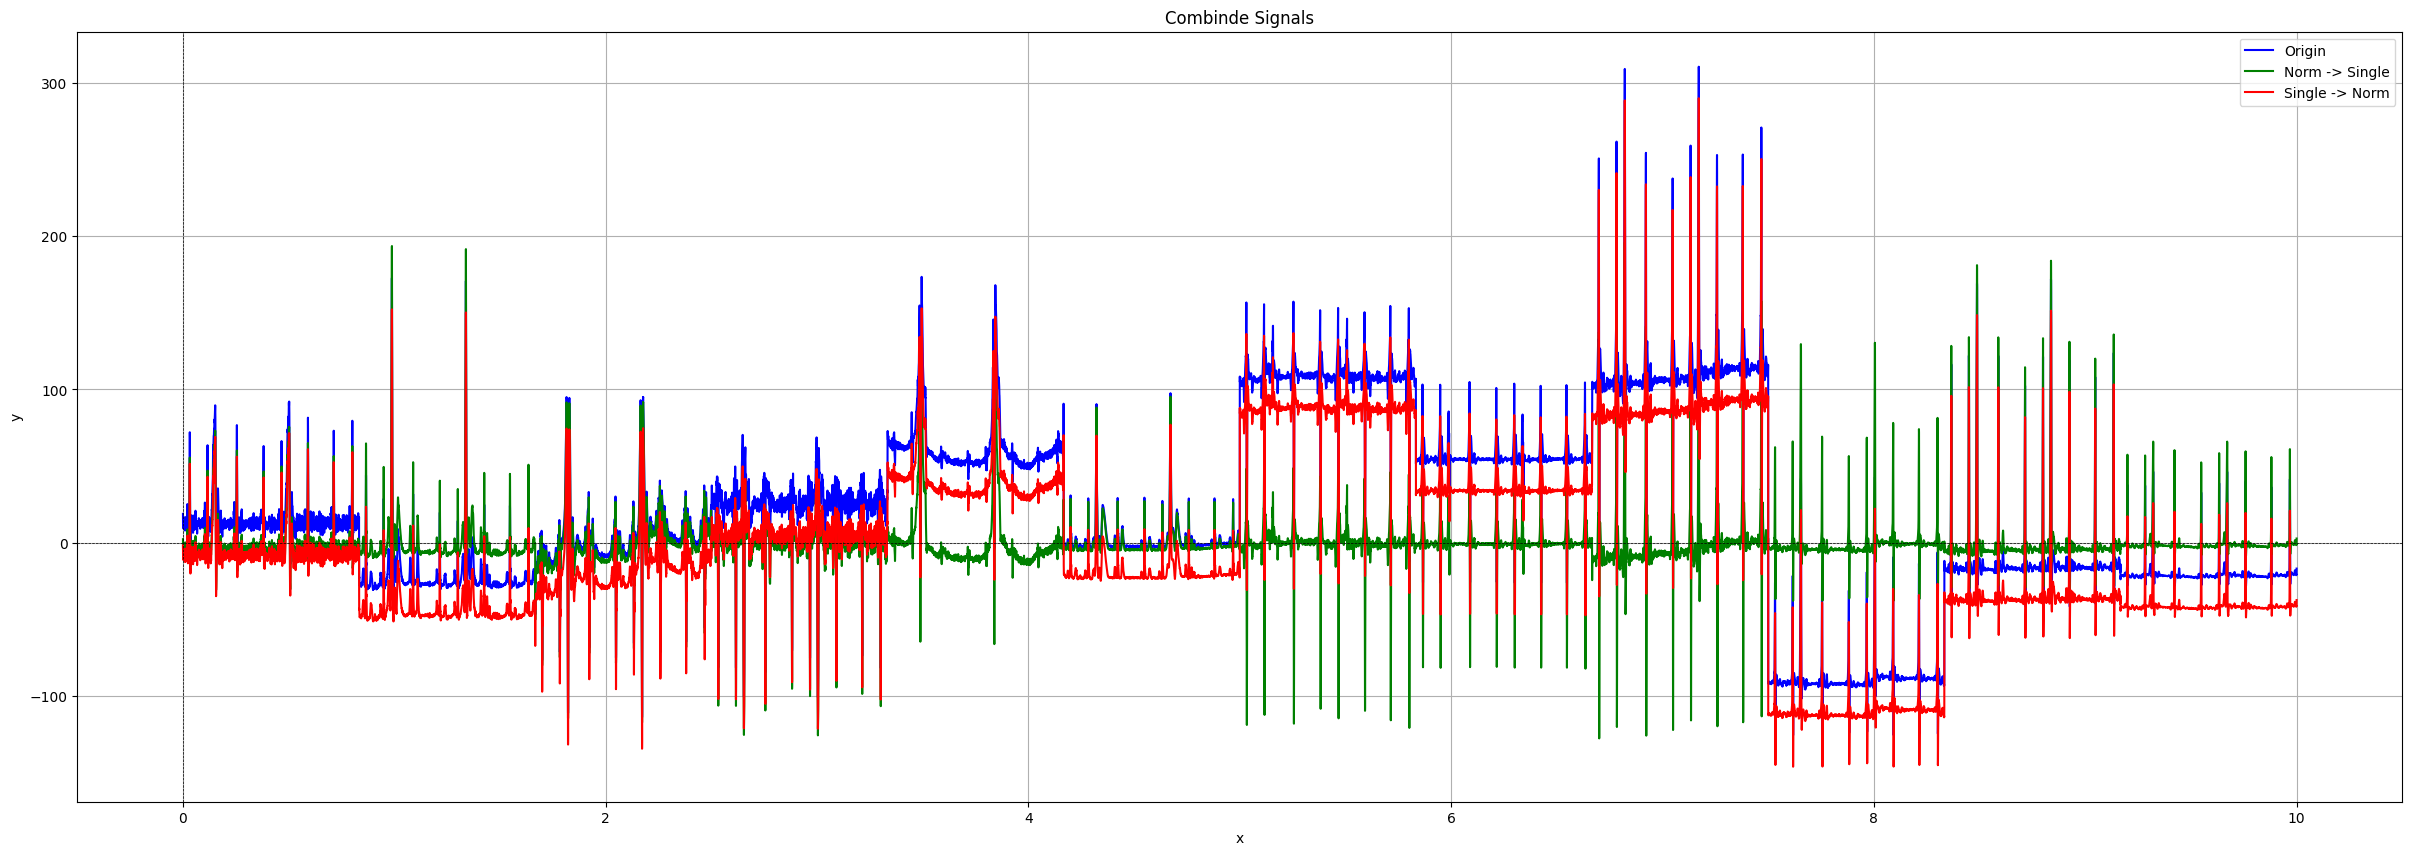

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


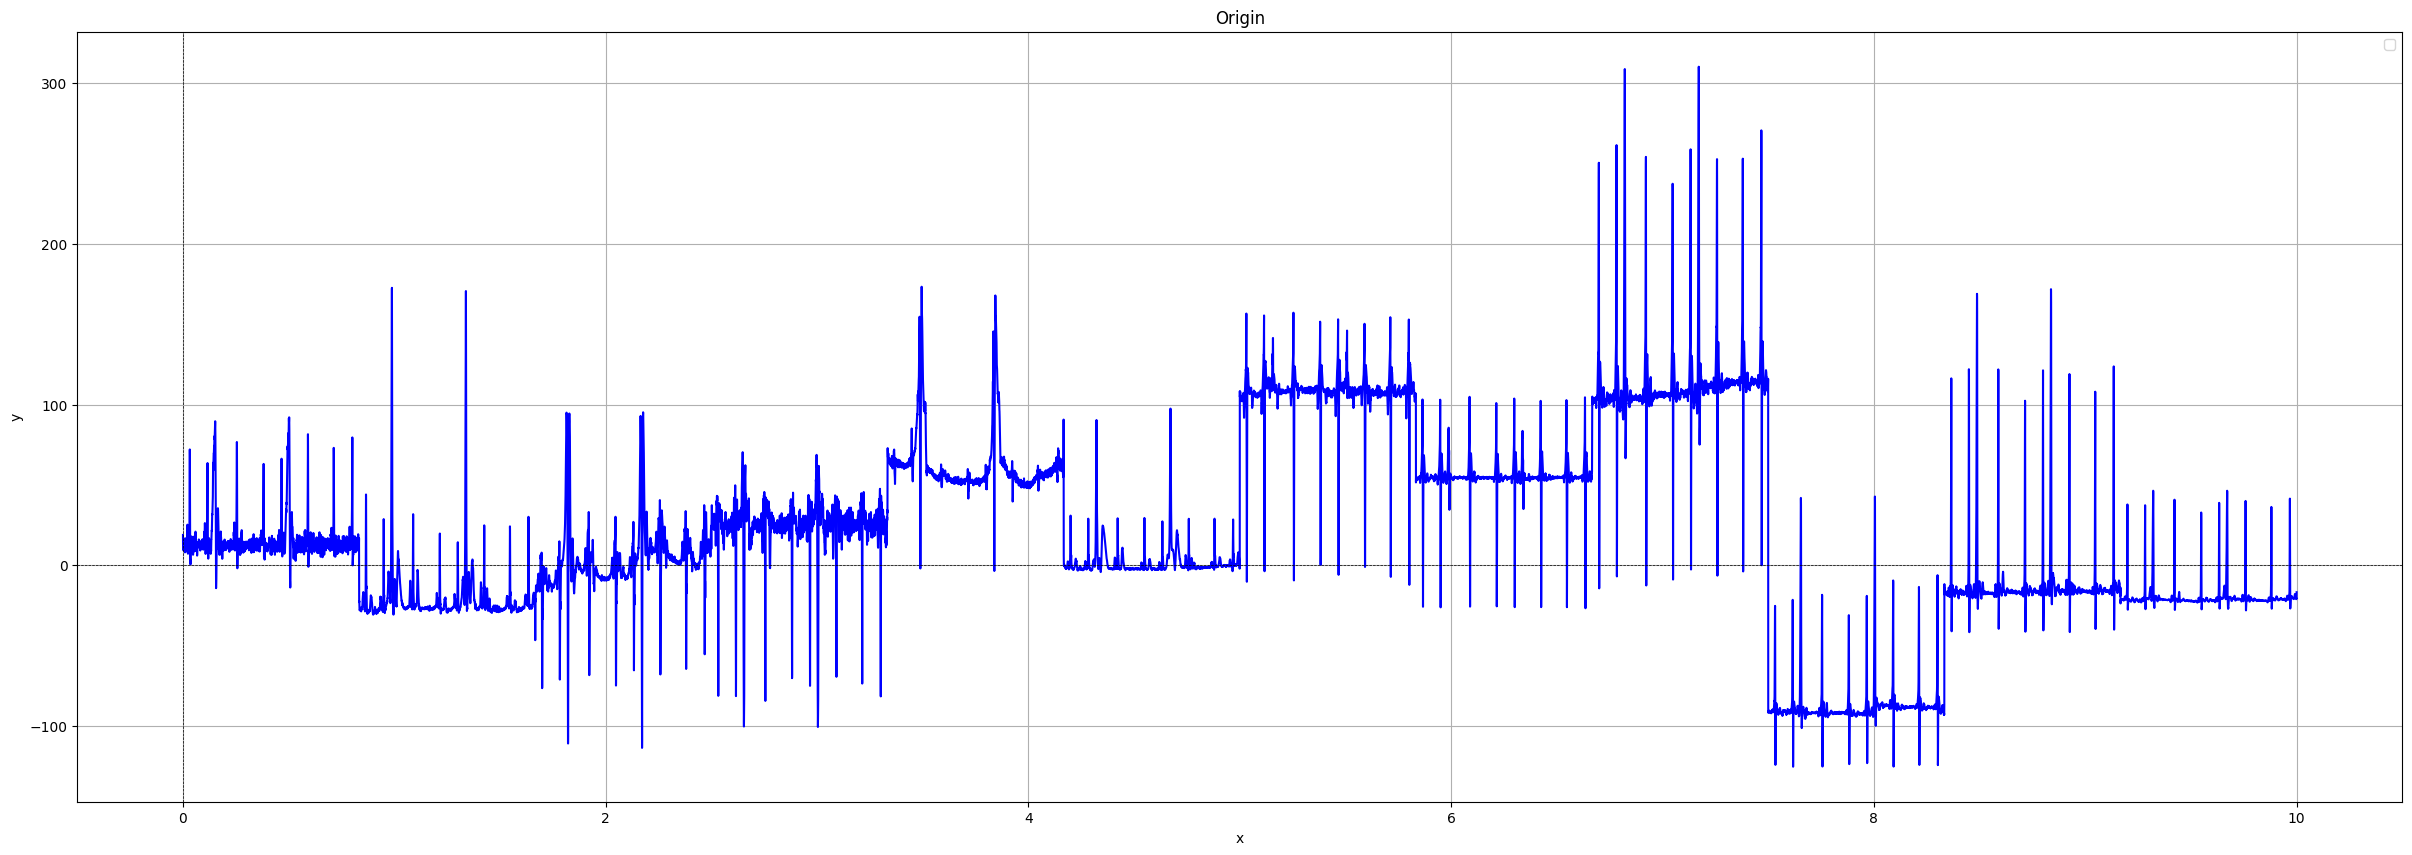

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


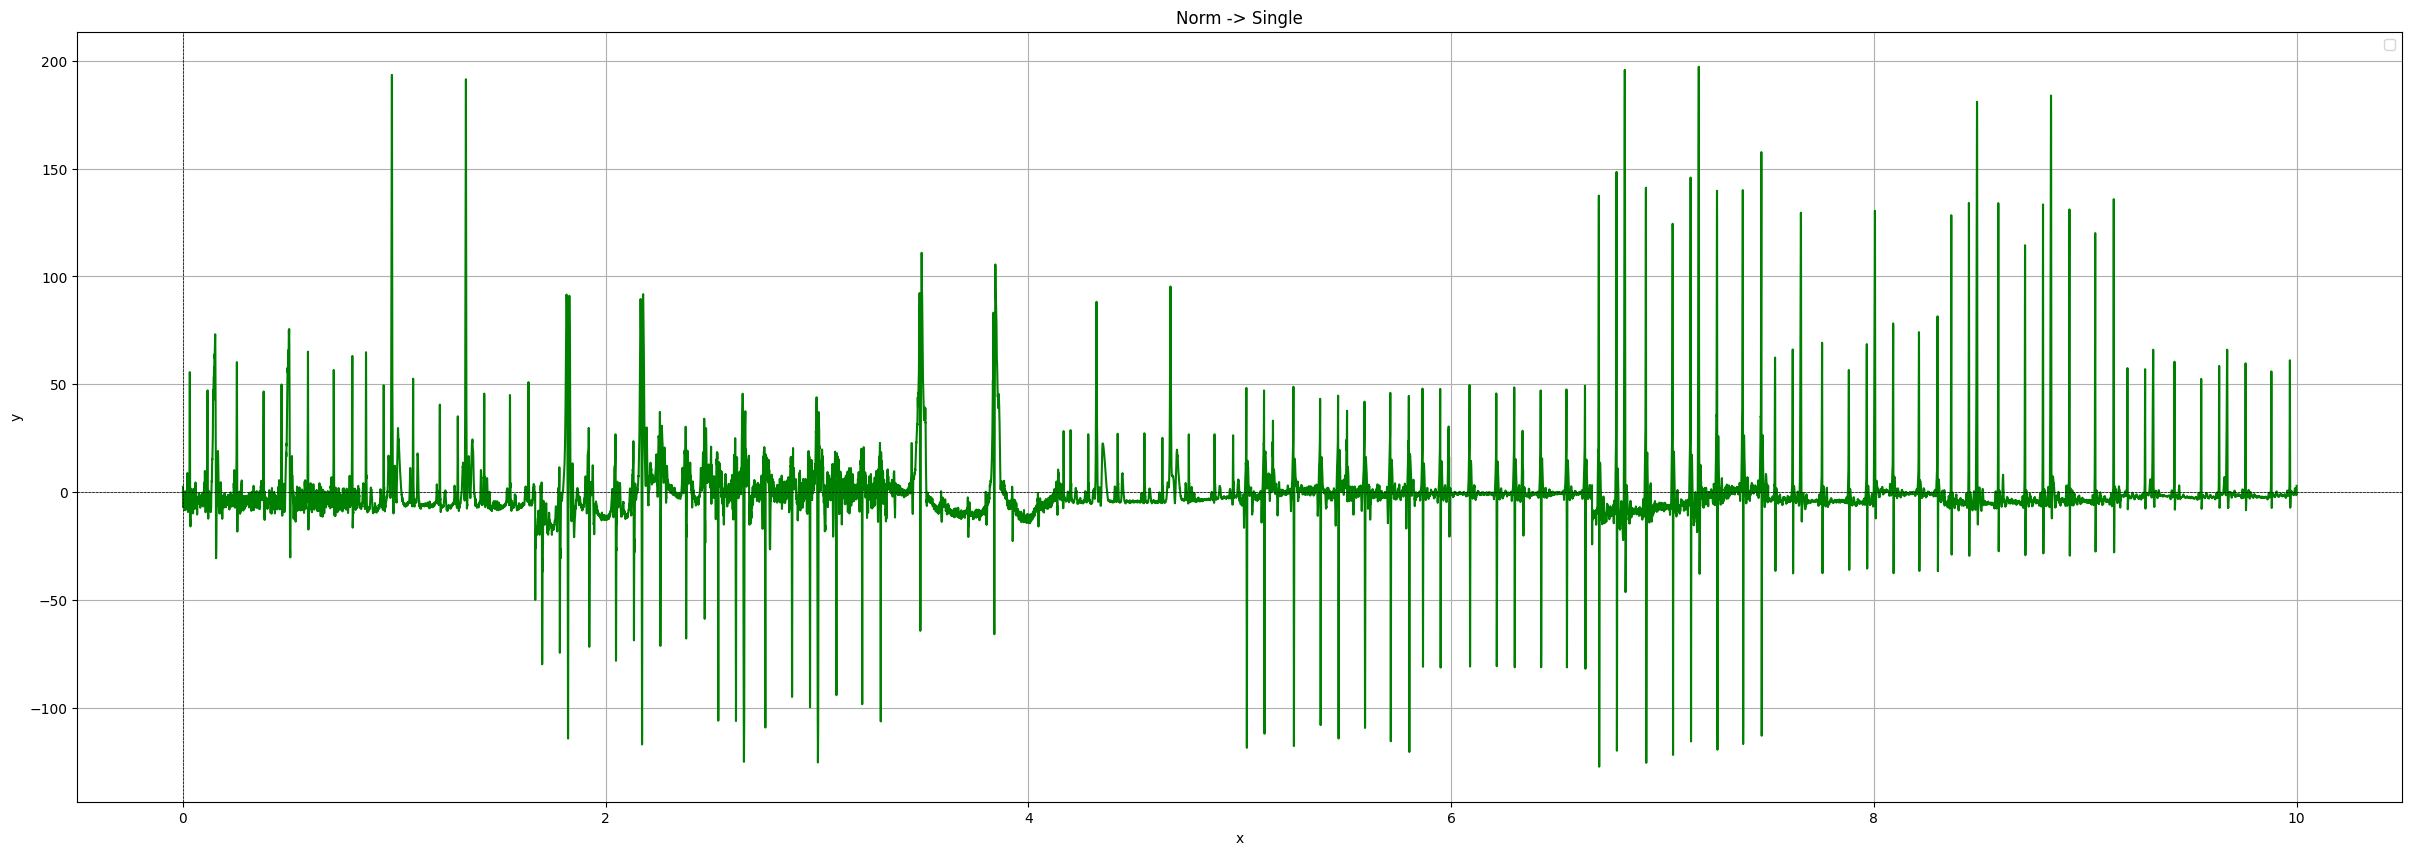

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


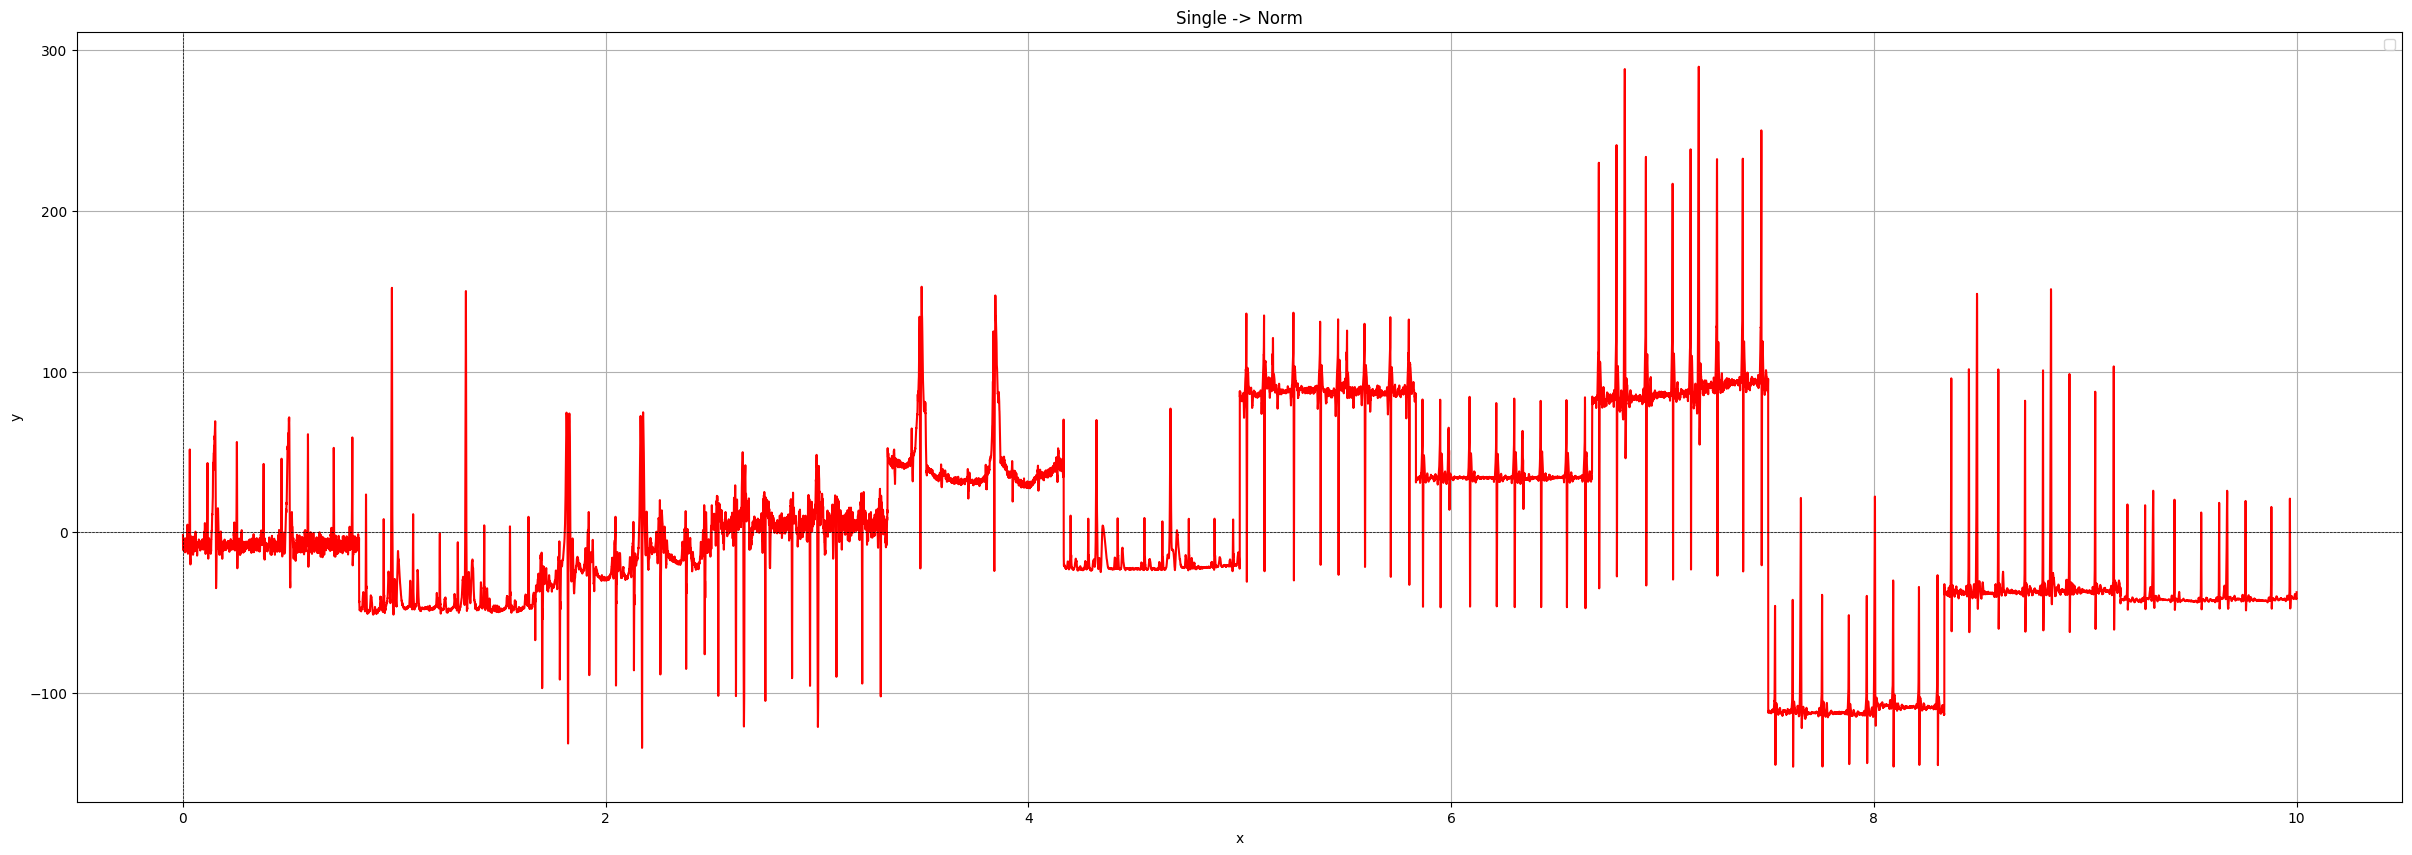

In [17]:
import matplotlib.pyplot as plt

# x = np.linspace(0, 10, 60000)
x = np.linspace(0, 10, 30000)

plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined0, label='Origin', color='blue')
plt.plot(x, kth_combined1, label='Norm -> Single', color='green')
plt.plot(x, kth_combined2, label='Single -> Norm', color='red')
plt.title('Combinde Signals')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined0, color='blue')
plt.title('Origin')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined1, color='green')
plt.title('Norm -> Single')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(x, kth_combined2, color='red')
plt.title('Single -> Norm')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()